In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

In [4]:
%cd music-compression

/content/music-compression


In [5]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train_classifier import TrainerClassifier

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
#!rm 'data/sample/fma_xs/train/099134.mp3'

In [0]:
#from utils.data_helper import stat_all_files
#stat_all_files('data/sample/fma_xs/')

In [0]:
cuda_flag = True

In [34]:
trainer = TrainerClassifier('data/sample/fma_xs/',
                  '/content/gdrive/My Drive/Colab Notebooks/music-compression/model_checkpoints/cnn_classifier_v1', 
                  batch_size=200, 
                  load_from_disk=False, 
                  cuda=cuda_flag)

copying params from  encoder_model.conv1.weight
copying params from  encoder_model.conv1.bias
copying params from  encoder_model.conv2.weight
copying params from  encoder_model.conv2.bias
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 1e-05
)


In [35]:
trainer.train(num_epochs=1000)

Epoch:1, Loss:2.0587
Epoch:11, Loss:1.8936
Epoch:21, Loss:2.0968
Epoch:31, Loss:2.0164
Epoch:41, Loss:1.7019
Epoch:51, Loss:1.8353
Epoch:61, Loss:1.6673
Epoch:71, Loss:1.8690
Epoch:81, Loss:1.8943
Epoch:91, Loss:1.6638
Epoch:101, Loss:1.6692
Epoch:111, Loss:1.6926
Epoch:121, Loss:1.5682
Epoch:131, Loss:1.7140
Epoch:141, Loss:1.6944
Epoch:151, Loss:1.4886
Epoch:161, Loss:1.5869
Epoch:171, Loss:1.5155
Epoch:181, Loss:1.6403
Epoch:191, Loss:1.6208
Epoch:201, Loss:1.4944
Epoch:211, Loss:1.4587
Epoch:221, Loss:1.4042
Epoch:231, Loss:1.5252
Epoch:241, Loss:1.4536
Epoch:251, Loss:1.6446
Epoch:261, Loss:1.5305
Epoch:271, Loss:1.8010
Epoch:281, Loss:1.5325
Epoch:291, Loss:1.5214
Epoch:301, Loss:1.4699
Epoch:311, Loss:1.4486
Epoch:321, Loss:1.4354
Epoch:331, Loss:1.4495
Epoch:341, Loss:1.3620
Epoch:351, Loss:1.5611
Epoch:361, Loss:1.3093
Epoch:371, Loss:1.2471
Epoch:381, Loss:1.4987
Epoch:391, Loss:1.3017
Epoch:401, Loss:1.2556
Epoch:411, Loss:1.5053
Epoch:421, Loss:1.4396
Epoch:431, Loss:1.4121

KeyboardInterrupt: ignored

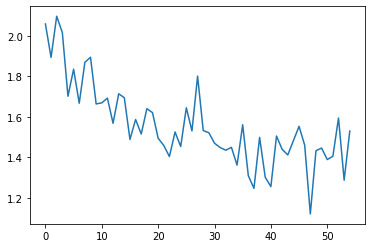

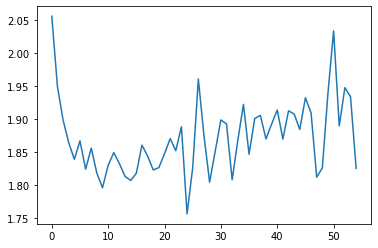

In [38]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')

In [39]:
accuracy = trainer.get_accuracy()
print('Accuracy = {}'.format(accuracy))

Accuracy = 0.3142857142857143
